In [1]:
#add auto reload for src function testing
%load_ext autoreload
%autoreload 2

#let's add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
    
#also import all of our modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from src import data_cleaning
from src import cm_functions

#and here is our data directiory
data_folder = '../../data/'

In [2]:
sale=pd.read_csv(data_folder+'EXTR_RPSale_final.csv',dtype={'PIN':'string'})
res_bldg=pd.read_csv(data_folder+'EXTR_ResBldg_final.csv',dtype={'PIN':'string'})

df = pd.merge(sale, res_bldg, on='PIN', how='inner')

## Price vs Sq Ft

In [3]:
for column in df.columns:
    print(column)

Unnamed: 0_x
ExciseTaxNbr
Major_x
Minor_x
DocumentDate
SalePrice
RecordingNbr
Volume
Page
PlatNbr
PlatType
PlatLot
PlatBlock
SellerName
BuyerName
PropertyType
PrincipalUse
SaleInstrument
AFForestLand
AFCurrentUseLand
AFNonProfitUse
AFHistoricProperty
SaleReason
PropertyClass
SaleWarning
PIN
Unnamed: 0_y
Major_y
Minor_y
BldgNbr
NbrLivingUnits
Address
BuildingNumber
Fraction
DirectionPrefix
StreetName
StreetType
DirectionSuffix
ZipCode
Stories
BldgGrade
BldgGradeVar
SqFt1stFloor
SqFtHalfFloor
SqFt2ndFloor
SqFtUpperFloor
SqFtUnfinFull
SqFtUnfinHalf
SqFtTotLiving
SqFtTotBasement
SqFtFinBasement
FinBasementGrade
SqFtGarageBasement
SqFtGarageAttached
DaylightBasement
SqFtOpenPorch
SqFtEnclosedPorch
SqFtDeck
HeatSystem
HeatSource
BrickStone
ViewUtilization
Bedrooms
BathHalfCount
Bath3qtrCount
BathFullCount
FpSingleStory
FpMultiStory
FpFreestanding
FpAdditional
YrBuilt
YrRenovated
PcntComplete
Obsolescence
PcntNetCondition
Condition
AddnlCost


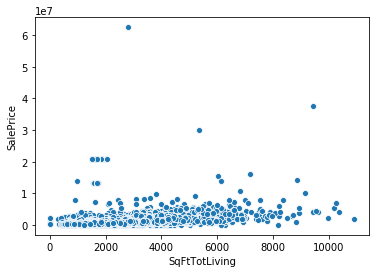

In [4]:
sns.scatterplot(df.SqFtTotLiving, df.SalePrice)

In [5]:
z = np.abs(stats.zscore(df.SalePrice))
no_outliers = df[z < 3]

no_outliers

,Unnamed: 0_x,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,0,3027422,213043,120,2019-12-20,560000,20191226000848,,,,...,0,0,0,1989,0,0,0,0,3,0
1,1,3002257,940652,630,2019-07-22,435000,20190730001339,,,,...,1,0,0,1994,0,0,0,0,3,2500
2,2,2993601,140281,20,2019-06-04,450000,20190614000489,,,,...,0,0,0,1986,0,0,0,0,3,0
3,3,3015264,124550,98,2019-09-27,193000,20191015000395,,,,...,1,0,0,1980,0,0,0,0,3,0
4,4,2980648,797320,2320,2019-03-27,540000,,,,,...,0,0,0,1930,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28766,28766,2972689,929085,760,2019-01-25,1205000,20190206001611,,,,...,0,0,0,1989,0,0,0,0,3,0
28767,28767,2992593,405940,95,2019-05-21,442000,20190607001670,,,,...,0,0,0,1944,0,0,0,0,4,0
28768,28768,3003079,381670,25,2019-07-22,680000,20190802000628,,,,...,1,0,1,1958,0,0,0,0,3,0
28769,28769,3025068,615020,505,2019-11-18,745000,20191212000602,,,,...,0,0,0,1947,2009,0,0,0,3,0


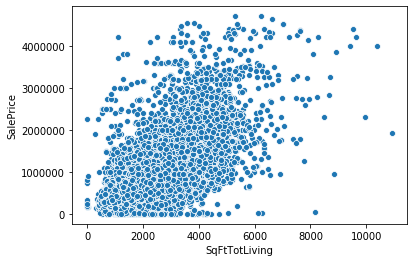

In [6]:
sns.scatterplot(no_outliers.SqFtTotLiving, no_outliers.SalePrice)

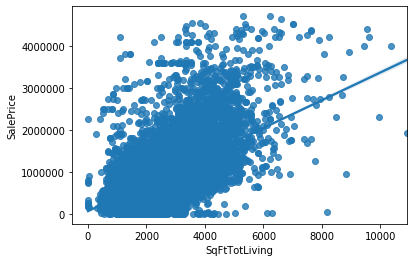

In [7]:
sns.regplot(no_outliers.SqFtTotLiving, no_outliers.SalePrice)

These might be usable, let's try scaling the data

In [8]:
from sklearn import preprocessing

In [9]:
scaled_prices = preprocessing.scale(no_outliers.SalePrice)

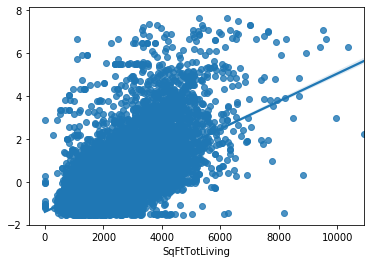

In [10]:
sns.regplot(no_outliers.SqFtTotLiving, scaled_prices)

In [11]:
scaled_size = preprocessing.scale(no_outliers.SqFtTotLiving)

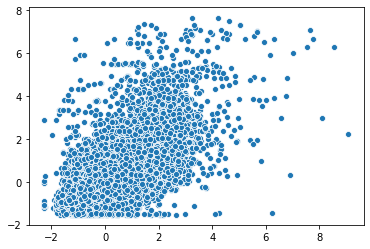

In [12]:
sns.scatterplot(scaled_size, scaled_prices)

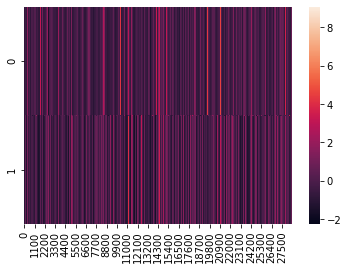

In [13]:
sns.heatmap([scaled_prices, scaled_size])

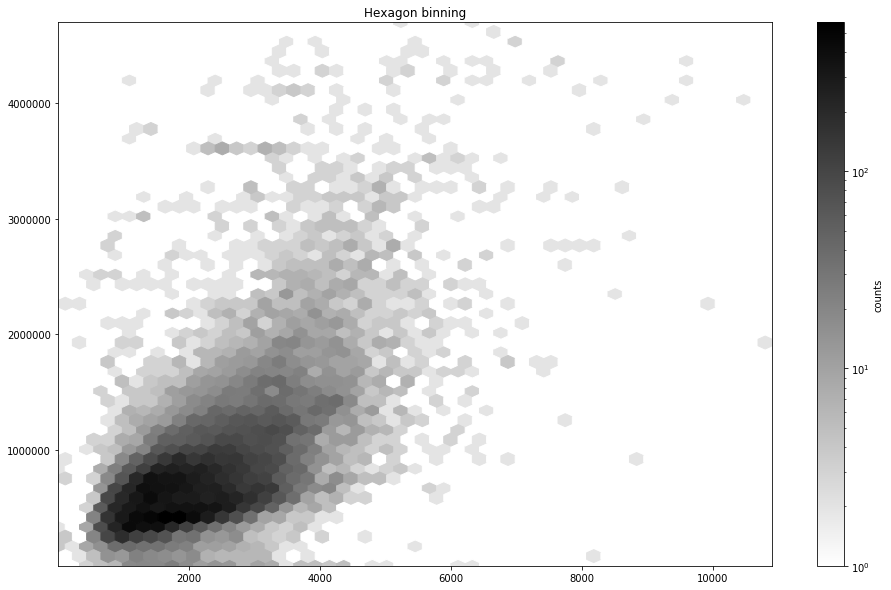

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(16, 10))


hb = ax.hexbin(x, y, gridsize=50, cmap='binary', bins = 'log')
ax.axis([xmin, xmax, ymin, ymax])

cb = fig.colorbar(hb, ax=ax)


#set text
ax.set_title("Hexagon binning")
cb.set_label('counts')

#set font

plt.savefig('hex_bin.png', transparent=True)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

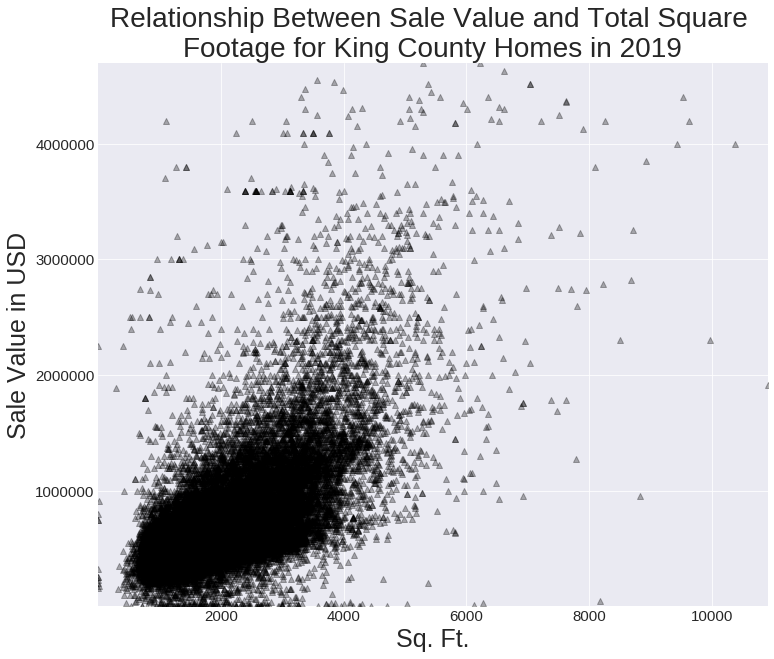

In [16]:
plt.style.use('seaborn-darkgrid')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])



#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('price_sq_ft_transparent.png', transparent=True)

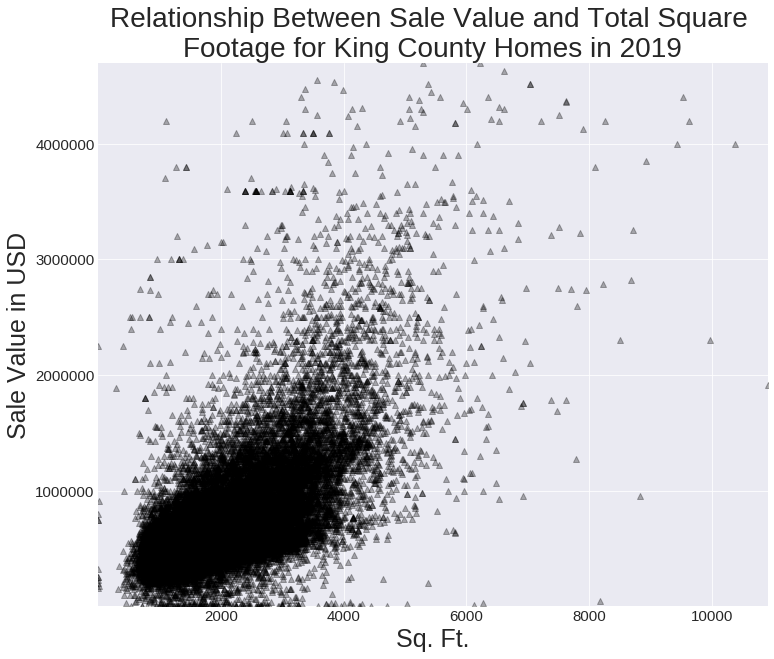

In [17]:
plt.style.use('seaborn-darkgrid')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot()

#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('price_sq_ft.png')

## Sale Instrument

First I'm going to recreate our data set so that it goes through all relevant filters except non-zero values.

In [18]:
rp_sale = pd.read_csv(data_folder+'EXTR_RPSale.csv', dtype={'Major': 'str', 'Minor':'str'})
print('Imported')

filter_one = data_cleaning.filter_data_by_year(rp_sale, 2019)
print('filter one done')
filter_two = filter_one[(filter_one['SaleReason']==1)|(filter_one['SaleReason']==18)]
print('filter two done')
filter_three = filter_two[(filter_two['PropertyClass'] == 7)|(filter_two['PropertyClass'] == 8)]
print('filter three done')


Imported
filter one done
filter two done
filter three done


Add a PIN column and filter out one building parcels.

In [20]:
res_bldg = pd.read_csv(data_folder+'EXTR_ResBldg.csv', dtype={'Major': 'str', 'Minor':'str', 'ZipCode': 'str'})

res_bldg = data_cleaning.add_PIN_column(res_bldg)
filter_three = data_cleaning.add_PIN_column(filter_three)

/home/max/flatiron/chi-ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Major'] = df['Major'].apply(str)
/home/max/flatiron/chi-ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minor'] = df['Minor'].apply(str)
/home/max/flatiron/chi-ds/module_2/week_3/projects/mod2_housing_sales/src/data_cleaning.py:48: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [21]:
number_of_buildings = res_bldg.groupby('PIN').BldgNbr.count()

one_building_parcels = pd.DataFrame(number_of_buildings[number_of_buildings==1].index) 
one_building_parcels = one_building_parcels.set_index('PIN')

In [22]:
one_building_parcels

""
PIN
0000400001
0001000003
0001000009
0001000035
0001000040
...
9906000060
9906000065
9906000080


In [23]:
filter_five = pd.merge(filter_three, one_building_parcels, how='inner', on='PIN')


In [24]:
filter_five.SalePrice.describe()

count    3.847800e+04
mean     6.455789e+05
std      1.173638e+06
min      0.000000e+00
25%      0.000000e+00
50%      5.300000e+05
75%      8.100000e+05
max      6.250000e+07
Name: SalePrice, dtype: float64

## With zero valued sales

In [25]:
filter_five

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,...,6,3,N,N,N,N,1,8,,1402810020
3,3015516,779790,0030,2019-10-07,0,20191016000009,,,,,...,6,3,N,N,N,N,1,8,,7797900030
4,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38473,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,...,6,3,N,N,N,N,1,8,,4059400095
38474,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,...,6,3,N,N,N,N,1,8,,3816700025
38475,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,...,6,3,N,N,N,N,1,8,,6150200505
38476,2997920,302300,0320,2019-05-01,0,20190705000539,,,,,...,6,15,N,N,N,N,1,8,,3023000320


## Without zero valued sales

In [27]:
filter_five[filter_five.SalePrice!=0]

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,PIN
0,3027422,213043,0120,2019-12-20,560000,20191226000848,,,,,...,6,3,N,N,N,N,1,8,,2130430120
1,3002257,940652,0630,2019-07-22,435000,20190730001339,,,,,...,6,3,N,N,N,N,1,8,,9406520630
2,2993601,140281,0020,2019-06-04,450000,20190614000489,,,,,...,6,3,N,N,N,N,1,8,,1402810020
4,3015264,124550,0098,2019-09-27,193000,20191015000395,,,,,...,6,15,N,N,N,N,18,8,18 51 52,1245500098
5,2980648,797320,2320,2019-03-27,540000,,,,,,...,6,3,N,N,N,N,1,8,,7973202320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38472,2972689,929085,0760,2019-01-25,1205000,20190206001611,,,,,...,6,24,N,N,N,N,18,8,12,9290850760
38473,2992593,405940,0095,2019-05-21,442000,20190607001670,,,,,...,6,3,N,N,N,N,1,8,,4059400095
38474,3003079,381670,0025,2019-07-22,680000,20190802000628,,,,,...,6,3,N,N,N,N,1,8,,3816700025
38475,3025068,615020,0505,2019-11-18,745000,20191212000602,,,,,...,6,3,N,N,N,N,1,8,,6150200505


Since we lose over a quarter of our data, let's look at the reason why there are zero valued sales.

In [75]:
zeros = filter_five[filter_five.SalePrice==0]

types_of_sales = zeros.SaleInstrument.value_counts()
types_of_sales

15    7271
3     1649
26     327
24     166
2      114
27      78
4       54
18      20
22      19
19       4
21       2
20       2
23       1
Name: SaleInstrument, dtype: int64

Let's create a dictionary to see what this means.

In [76]:
lookup = pd.read_csv(data_folder+'EXTR_LookUp.csv')

In [77]:
inst_lookups = lookup[lookup['LUType']==6]

inst_lookups

,LUType,LUItem,LUDescription
1002,6,1,None ...
1003,6,10,Real Estate Contract ...
1004,6,11,Purchaser's Assignment ...
1005,6,13,Seller's Assignment ...
1006,6,15,Quit Claim Deed ...
1007,6,18,Trustees' Deed ...
1008,6,19,Executor's Deed ...
1009,6,2,Warranty Deed ...
1010,6,20,Fiduciary Deed ...
1011,6,21,Sheriff's Deed ...


In [78]:
converter_dict = dict(zip(inst_lookups.LUItem, inst_lookups.LUDescription))

Looks like i need to trim some whitespace.

In [79]:
trimmed_desc = inst_lookups['LUDescription'].apply(lambda x: x.strip())
trimmed_desc

1002                               None
1003               Real Estate Contract
1004             Purchaser's Assignment
1005                Seller's Assignment
1006                    Quit Claim Deed
1007                     Trustees' Deed
1008                    Executor's Deed
1009                      Warranty Deed
1010                     Fiduciary Deed
1011                     Sheriff's Deed
1012             Bargain and Sales Deed
1013                     Receivers Deed
1014               Deed of Personal Rep
1015           Judgment Per Stipulation
1016              Other - See Affidavit
1017                               DEED
1018    Forfeiture Real Estate Contract
1019            Statutory Warranty Deed
1020              Special Warranty Deed
1021            Corporate Warranty Deed
1022           Assumption Warranty Deed
1023                         Grant Deed
1024                  Contract (equity)
1025             Contract (installment)
Name: LUDescription, dtype: object

In [80]:
converter_dict = dict(zip(inst_lookups.LUItem, trimmed_desc))
converter_dict

{1: 'None',
 10: 'Real Estate Contract',
 11: "Purchaser's Assignment",
 13: "Seller's Assignment",
 15: 'Quit Claim Deed',
 18: "Trustees' Deed",
 19: "Executor's Deed",
 2: 'Warranty Deed',
 20: 'Fiduciary Deed',
 21: "Sheriff's Deed",
 22: 'Bargain and Sales Deed',
 23: 'Receivers Deed',
 24: 'Deed of Personal Rep',
 25: 'Judgment Per Stipulation',
 26: 'Other - See Affidavit',
 27: 'DEED',
 28: 'Forfeiture Real Estate Contract',
 3: 'Statutory Warranty Deed',
 4: 'Special Warranty Deed',
 5: 'Corporate Warranty Deed',
 6: 'Assumption Warranty Deed',
 7: 'Grant Deed',
 8: 'Contract (equity)',
 9: 'Contract (installment)'}

In [82]:
key_desc = types_of_sales.keys().map(lambda num: converter_dict[num])

Index(['Quit Claim Deed', 'Statutory Warranty Deed', 'Other - See Affidavit',
       'Deed of Personal Rep', 'Warranty Deed', 'DEED',
       'Special Warranty Deed', 'Trustees' Deed', 'Bargain and Sales Deed',
       'Executor's Deed', 'Sheriff's Deed', 'Fiduciary Deed',
       'Receivers Deed'],
      dtype='object')

In [87]:
desc_counts = types_of_sales.values

In [88]:
desc_counts

array([7271, 1649,  327,  166,  114,   78,   54,   20,   19,    4,    2,
          2,    1])

In [90]:
types_of_sales_dict = dict(zip(key_desc, desc_counts))
types_of_sales_dict

{'Quit Claim Deed': 7271,
 'Statutory Warranty Deed': 1649,
 'Other - See Affidavit': 327,
 'Deed of Personal Rep': 166,
 'Warranty Deed': 114,
 'DEED': 78,
 'Special Warranty Deed': 54,
 "Trustees' Deed": 20,
 'Bargain and Sales Deed': 19,
 "Executor's Deed": 4,
 "Sheriff's Deed": 2,
 'Fiduciary Deed': 2,
 'Receivers Deed': 1}

In [91]:
types_of_sales

15    7271
3     1649
26     327
24     166
2      114
27      78
4       54
18      20
22      19
19       4
21       2
20       2
23       1
Name: SaleInstrument, dtype: int64

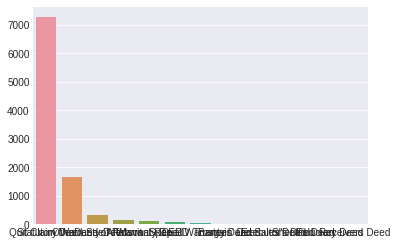

In [95]:
categories = list(types_of_sales_dict.keys())
counts = list(types_of_sales_dict.values())

sns.barplot(x = categories, y = counts)

dict_keys(['Quit Claim Deed', 'Statutory Warranty Deed', 'Other - See Affidavit', 'Deed of Personal Rep', 'Warranty Deed', 'DEED', 'Special Warranty Deed', "Trustees' Deed", 'Bargain and Sales Deed', "Executor's Deed", "Sheriff's Deed", 'Fiduciary Deed', 'Receivers Deed'])

Now I want to convert the counts to a percentage.

In [96]:
total = sum(counts)
total

9707

In [100]:
percents = [round((count/total)*100, 2) for count in counts]
percents

[74.9, 16.99, 3.37, 1.71, 1.17, 0.8, 0.56, 0.21, 0.2, 0.04, 0.02, 0.02, 0.01]

Now I want to make the plot prettier

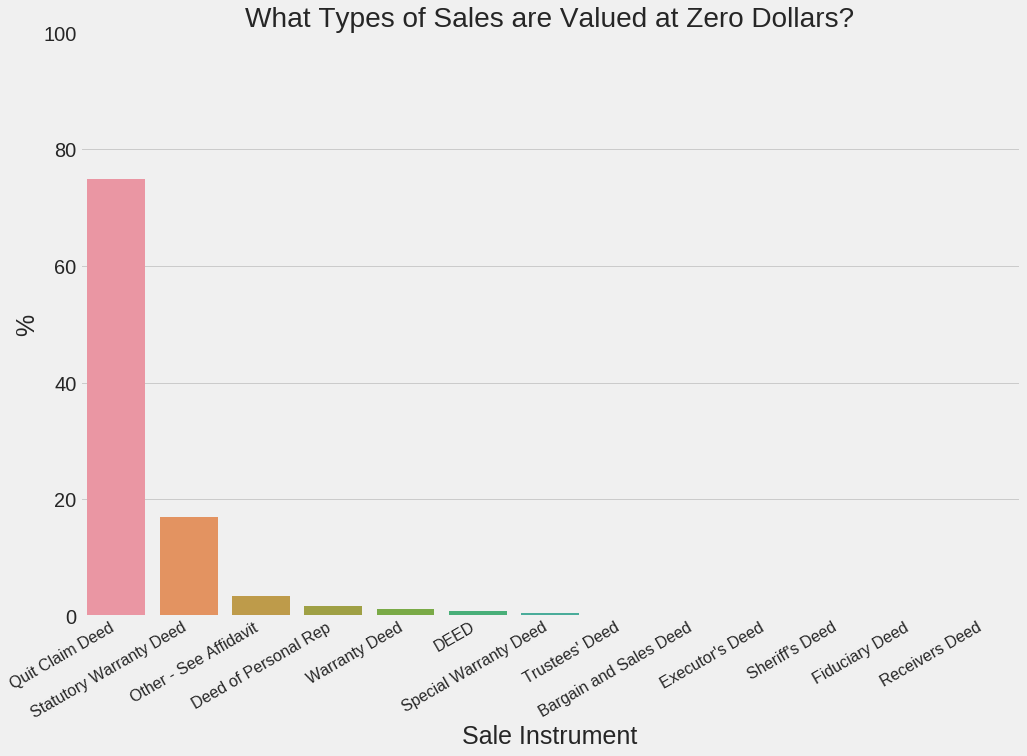

In [129]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(1,1, figsize=(15,10))

sns.barplot(categories, percents, ax=ax)



#set text
ax.set_title("What Types of Sales are Valued at Zero Dollars?", fontsize=28)
ax.tick_params(axis='x',labelsize=16, labelrotation=30)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel('Sale Instrument', fontsize = 25)
ax.set_ylabel('%', fontsize = 25)
ax.set_xticklabels(categories, ha='right')
ax.set_ylim(0,100)

plt.savefig('sales_instruments.png',dpi=300, bbox_inches = "tight")

# Reg line

In [140]:
b = 65260
m = 329.6531

minimum = no_outliers.SalePrice.min()
maximum =  no_outliers.SalePrice.max()

x = np.linspace(minimum, maximum, 100)


array([5.00000000e+00, 4.74796970e+04, 9.49543939e+04, 1.42429091e+05,
       1.89903788e+05, 2.37378485e+05, 2.84853182e+05, 3.32327879e+05,
       3.79802576e+05, 4.27277273e+05, 4.74751970e+05, 5.22226667e+05,
       5.69701364e+05, 6.17176061e+05, 6.64650758e+05, 7.12125455e+05,
       7.59600152e+05, 8.07074848e+05, 8.54549545e+05, 9.02024242e+05,
       9.49498939e+05, 9.96973636e+05, 1.04444833e+06, 1.09192303e+06,
       1.13939773e+06, 1.18687242e+06, 1.23434712e+06, 1.28182182e+06,
       1.32929652e+06, 1.37677121e+06, 1.42424591e+06, 1.47172061e+06,
       1.51919530e+06, 1.56667000e+06, 1.61414470e+06, 1.66161939e+06,
       1.70909409e+06, 1.75656879e+06, 1.80404348e+06, 1.85151818e+06,
       1.89899288e+06, 1.94646758e+06, 1.99394227e+06, 2.04141697e+06,
       2.08889167e+06, 2.13636636e+06, 2.18384106e+06, 2.23131576e+06,
       2.27879045e+06, 2.32626515e+06, 2.37373985e+06, 2.42121455e+06,
       2.46868924e+06, 2.51616394e+06, 2.56363864e+06, 2.61111333e+06,
      

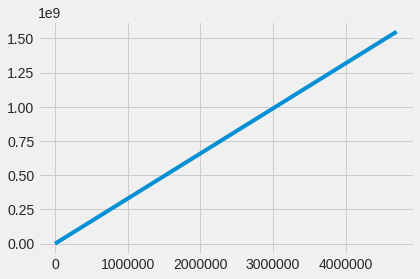

In [141]:
sns.lineplot(x=x, y=m*x+b)

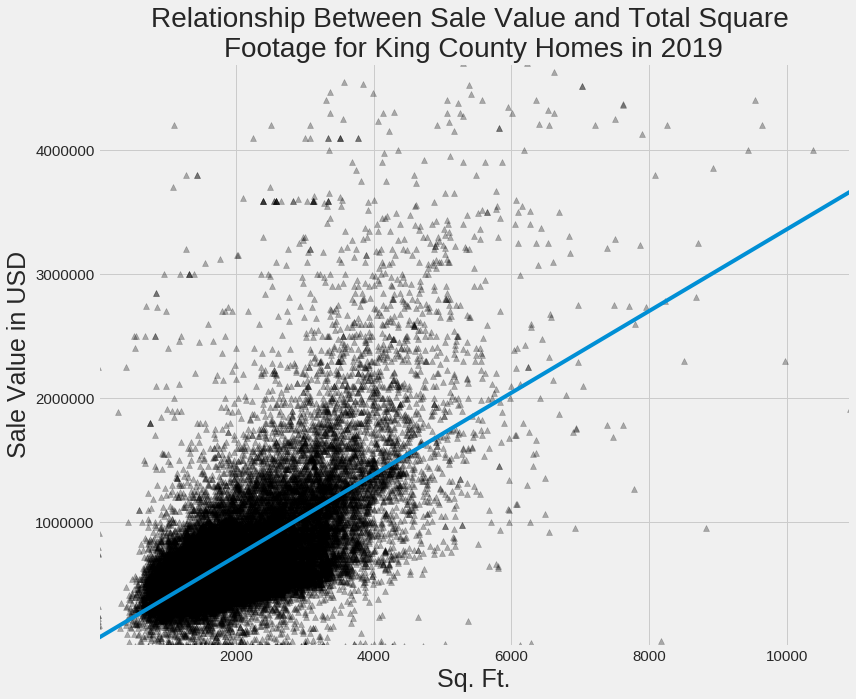

In [147]:
#line
b = 65260
m = 329.6531

minimum = no_outliers.SalePrice.min()
maximum =  no_outliers.SalePrice.max()

x_line = np.linspace(minimum, maximum, 100)
y_line = m*x_line+b

plt.style.use('fivethirtyeight')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot(x_line, y_line)

#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('reg_plot.png',dpi=300, bbox_inches = "tight")

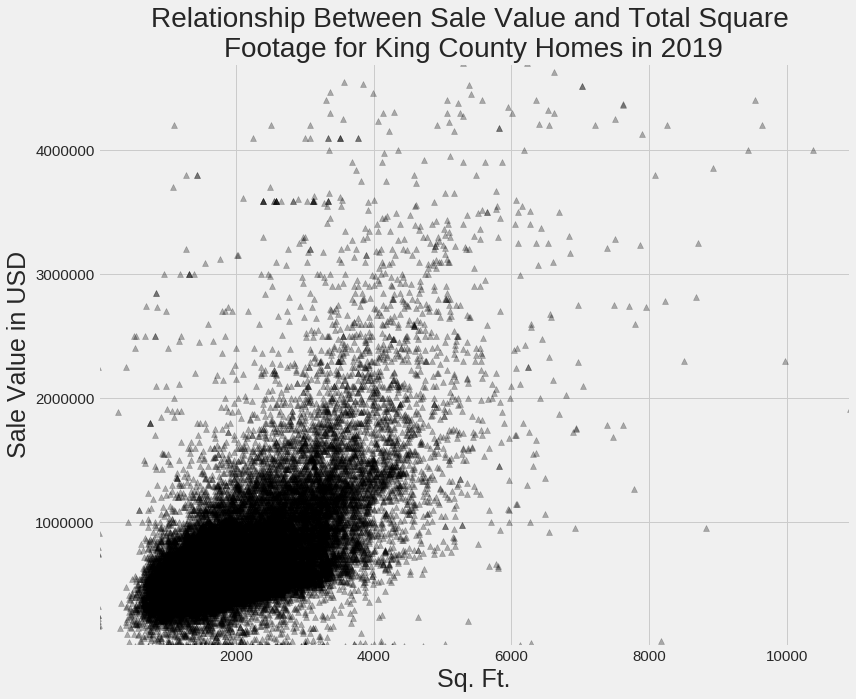

In [148]:
plt.style.use('fivethirtyeight')

# format
x = no_outliers.SqFtTotLiving
y = no_outliers.SalePrice
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, ax = plt.subplots(1,1 , sharey=True, figsize=(12, 10))


ax.scatter(x, y, marker='^', alpha=.3, c='black')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot()

#set text
ax.set_title("Relationship Between Sale Value and Total Square \nFootage for King County Homes in 2019", fontsize=28)
ax.set_xlabel('Sq. Ft.', fontsize = 25)
ax.set_ylabel('Sale Value in USD', fontsize = 25)
ax.tick_params(labelsize=15)


plt.savefig('price_sq_ft.png',dpi=300, bbox_inches = "tight")